# Sentiment Analysis of Airline Tweets



Our inspiration for this Case Study - https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/



# 1. Data Exploration and Word Clouds

In [1]:
!pip install wordcloud

In [2]:
import numpy as np 

import pandas as pd 

import re

import nltk 

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# Get our data
import csv 

data_source_url = "/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv"

airline_tweets = pd.read_csv(data_source_url, delimiter='\t', on_bad_lines='skip', quoting=csv.QUOTE_NONE)

# View a sample of our dataset

airline_tweets

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0
...,...,...,...,...
69995,NaN,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1.0
69996,NaN,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1.0
69997,NaN,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0.0
69998,NaN,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1.0


In [4]:
print(airline_tweets[airline_tweets['label'].isin(['0', '1'])])

                                              Unnamed: 0 comment label  \
21              هزار پول ساندویچ شد، ولی بیشترش قارچ بود     SAD     1   
89      ساعت و نیم تاخیر برای ارسال یک عدد ساندویچ! و...     SAD     1   
161          تومن پیتزا خریدم سس نداده بود بدون سس خوردم     SAD     1   
180                          تا شونه تخم مرغ را نیاوردید     SAD     1   
243    - سریع رسید ۲- بسته بندی مناسب بود ۳- دور چین ...   HAPPY     0   
...                                                  ...     ...   ...   
69403   ساعت تاخیر در تحویل اجناس اصلا منطقی نیست!! ن...     SAD     1   
69467  . مقدار مخلفات داخل برگر خیلی کم. ۲. کاغذ بسته...   HAPPY     0   
69546   بابت بسته بندی و ارسال گرفته شد ولی غذا با تا...     SAD     1   
69548                          ساعت و ۴۵ دقیقه طول کشید.     SAD     1   
69943   قلم از سفارشاتم موجودی کمتری داشت که با هماهن...   HAPPY     0   

       label_id  
21          NaN  
89          NaN  
161         NaN  
180         NaN  
243         NaN  
...

In [5]:
# Define the function to adjust 'label' and 'label_id' columns
def adjust_labels(row):
    # If 'label' is a numeric string, move it to 'label_id' and update 'label'
    if row['label'] in ['0', '1']:
        row['label_id'] = int(row['label'])
        row['label'] = 'HAPPY' if row['label'] == '0' else 'SAD'
    return row

# Apply the function row-wise
airline_tweets = airline_tweets.apply(adjust_labels, axis=1)

# Check the unique values to confirm the adjustment
print("Unique values in 'label':", airline_tweets['label'].unique())
print("Unique values in 'label_id':", airline_tweets['label_id'].unique())


Unique values in 'label': ['SAD' 'HAPPY']
Unique values in 'label_id': [1. 0.]


In [6]:
airline_tweets.label.unique()

array(['SAD', 'HAPPY'], dtype=object)

### Generating Word Clouds from our Tweets

In [7]:
text = " ".join(review for review in airline_tweets['comment'])

print("There are {} words in the combination of all reviews.".format(len(text)))

There are 6305230 words in the combination of all reviews.


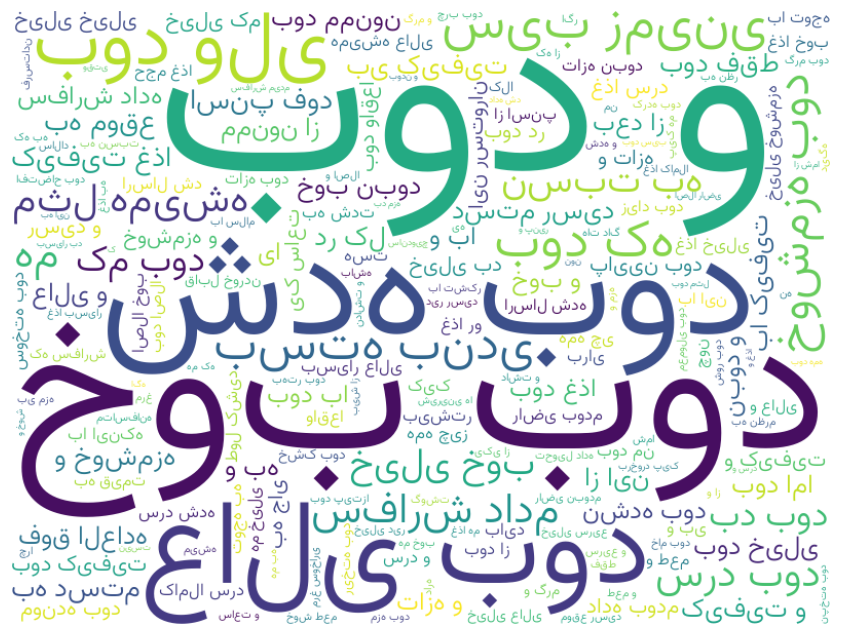

In [8]:
# Generate a word cloud image

# Load the Persian-compatible font (make sure 'Vazir.ttf' is in the same directory or provide the full path)
font_path = '/kaggle/input/persian-font/Vazirmatn-Light.ttf'  # Replace with the path to a Persian-compatible font

# Generate the word cloud with the specified font
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=600).generate(text)

# Display the Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

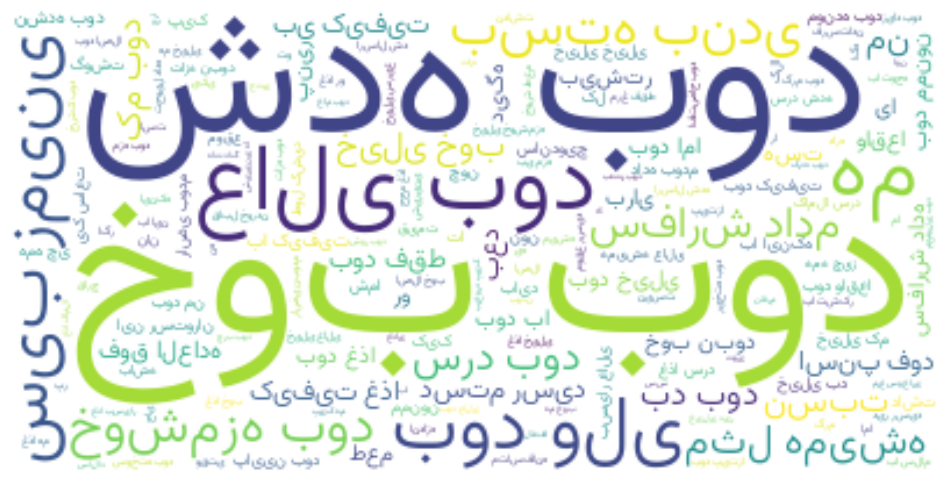

In [9]:
stopwords = set()



persian_stopwords = ["و", "به", "در", "از", "که"]  # Example Persian stop words
stopwords.update(persian_stopwords)



# Generate a word cloud image

wordcloud = WordCloud(font_path=font_path, stopwords = stopwords, background_color="white").generate(text)



# Display our Word Cloud

plt.figure(figsize=(12,8))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

### 2. Exploratory Analysis & Feature Extraction

<Axes: ylabel='count'>

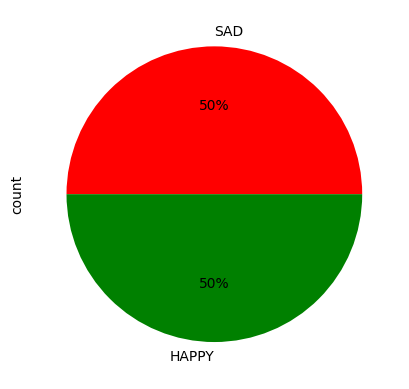

In [10]:
# Ratio of Negative to Neutral to Postive sentiments

airline_tweets.label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"])

### Feature Extraction

In [11]:
airline_tweets.head()

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0


In [ ]:
# Spliting the text and labels

features = airline_tweets.iloc[:, 1].values

labels = airline_tweets.iloc[:, 2].values

In [13]:
features

array(['واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح',
       'قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از موقع رسید، شما ببین چقدرررررررررررر پلاک خفنههههه، من سالهاست مشتریشونم و سالهاست مزه بهشت میده غذاشون',
       'قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط ظاهر فریبنده داره، پرش میکنن کالباس و قارچ',
       ...,
       'من قارچ اضافه رو اضافه کرده بودم بودم اما اگر همین هم اضافه نمی\u200cکردم نمیدونم دیگه چقدر کمتر از این میشد برای پیتزا قارچ زد. به هر حال ممنون اما یک مقدار هم اگر سعی بشه که خمیر پیتزا برشته\u200cتر دربیاد به طوری که وقتی یه فال پیتزا رو تو دست میگیریم پیتزا کج نشه ممنون',
       'همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو هوا',
       'فلفلش خییییلی تند بود.'], dtype=object)

In [14]:
labels

array(['SAD', 'HAPPY', 'SAD', ..., 'HAPPY', 'SAD', 'HAPPY'], dtype=object)

In [ ]:
# Cleaning up our text using Regular Expressions (regex)

processed_features = []


for sentence in range(0, len(features)):

    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

Comparing our processed features with the original tweets

In [16]:
features

array(['واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح',
       'قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از موقع رسید، شما ببین چقدرررررررررررر پلاک خفنههههه، من سالهاست مشتریشونم و سالهاست مزه بهشت میده غذاشون',
       'قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط ظاهر فریبنده داره، پرش میکنن کالباس و قارچ',
       ...,
       'من قارچ اضافه رو اضافه کرده بودم بودم اما اگر همین هم اضافه نمی\u200cکردم نمیدونم دیگه چقدر کمتر از این میشد برای پیتزا قارچ زد. به هر حال ممنون اما یک مقدار هم اگر سعی بشه که خمیر پیتزا برشته\u200cتر دربیاد به طوری که وقتی یه فال پیتزا رو تو دست میگیریم پیتزا کج نشه ممنون',
       'همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو هوا',
       'فلفلش خییییلی تند بود.'], dtype=object)

In [17]:
processed_features

['واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح',
 'قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از موقع رسید شما ببین چقدرررررررررررر پلاک خفنههههه من سالهاست مشتریشونم و سالهاست مزه بهشت میده غذاشون',
 'قیمت این مدل اصلا با کیفیتش سازگاری نداره فقط ظاهر فریبنده داره پرش میکنن کالباس و قارچ',
 'عالللی بود همه چه درست و به اندازه و کیفیت خوب امیداورم همیشه کیفیتتون خوب باشه ما مشتری همیشگی بشیم',
 'شیرینی وانیلی فقط یک مدل بود ',
 'بدترین پیتزایی که تا به حال خورده بودم',
 'از همه لحاظ عالی ممنونم',
 'کیفیت غذا متوسط رو به پایین بود انگار داخل یه رستوران معمولی غذا خوردی درحالی که امتیاز رستوران در اسنپ فود ۴ ۳ بود',
 'همه اقلام تازه و به روز وخیلیییییی سریع بدستم رسید واقعا متشکرم',
 'همه چی خوب ولی هات داگ دورش کلا سوخته بود و داخلش خام بود ',
 'اکلر فوق العاده بود اما بافت چیزکیک مونده بود و دوست نداشتم ',
 'خوب بود و از رستوران غنچه و اسنپ فود تشکر میکنم',
 'مثل همیشه عااااالی هستی پرپروک جاااااان مچکریم ازت',
 'kheili khub bud mersi vaghan',
 'عکس با شیریبی که ارسال کردند فرق داشت و

# 3. Creating our NLP Classifier Model

In [18]:
# Performing our vectoriztion using TF-IDF scheme from the Scikit-learn libary



import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer



# We use max_features of 2500 which is the top 2500 most frequently occuring words to create our bag of words model

# max_df specifies that only use those words that occur in a maximum of 80% of the documents.

# min-df is set to 7 which shows that include words that occur in at least 7 documents. 

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))



# We use the vectorizer.fit_transform to transform our words into our processed features vector

processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Create our training and test datasets using a 80%, 20% split



from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [36]:
!pip install cuml-cu12 cudf-cu12 rmm-cu12 cupy-cuda12x --extra-index-url=https://pypi.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [38]:
!pip uninstall -y cuml
!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [41]:
from sklearn.svm import SVC
text_classifier = SVC(kernel='linear')
text_classifier.fit(X_train, y_train)
print("Scikit-learn SVM model trained!")



Scikit-learn SVM model trained!


In [42]:
# Let's obtain our predictions on our test dataset

predictions = text_classifier.predict(X_test)

In [ ]:
# Let's display the results of our classifier on our test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

[[5631 1296]
 [ 698 6375]]
              precision    recall  f1-score   support

       HAPPY       0.89      0.81      0.85      6927
         SAD       0.83      0.90      0.86      7073

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

Accuracy 85.76%


In [44]:
# Obtain a test sample text from our test dataset



for i in range(0,5):

  rand_index = np.random.randint(0,len(processed_features))

  test_sample = processed_features[rand_index]

  print(test_sample)



  # Try our classifer on our text

  vector = vectorizer.transform([test_sample])

  output = text_classifier.predict(vector.toarray())

  print("Sentiment is - " + str(output[0]) + "\n")

مرغ بوی بدی میداد اصلا پیشنهاد نمیکنم
Sentiment is - SAD

خیلی خیلی شور بود هم جوجه هم کوبیده مخصوصا کوبیده که انگار داشتیم نمک میخوردیم و خیلی بد مزه بود
Sentiment is - SAD

واقعا بین رستورانهای اسنپ که من تا حالا ازشون سقارش داشتم یکی از بهترین ها هست تنها ایرادی که میتونم بگیرم سس استیک لوئ هم خیلی چرب بود هم اینکه سس عجیبی بود من تا حالا داخل سس استیک سس قارچ پیاز سرخ کرده ندیده بودم 
Sentiment is - HAPPY

ته چین هر بار کوچکتر میشه طول و عرضش برابر با سر چنگال بود مگه داریم این اندازه بعد ۱۲هزار قیمت کوتاهی پرسنل باعث میشه رستوران زیر سوال بره مگه ظرف ته چین خودش چه اندازه ست که نصفش هم خالیه 
Sentiment is - SAD

سایز ماکارون ها کاملا نامتقارن بود دوتا خیلی خیلی کوچیک بود و کیفیتش نسبت به قبل خیلی اوده بود پایین
Sentiment is - SAD

